In [2]:
from swampy import structshape as ss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import boto3
import sys
import os

### Ingest school directory dataset from S3

In [3]:
conn = boto3.client('s3')
local_dir_filename = 'directory_all.csv.bak'
if not os.path.exists('./' + local_dir_filename):
    conn.download_file(
        'edu-data-bucket', 'directory/schools_ccd_directory.csv', local_dir_filename)


In [4]:
df0 = pd.read_csv(local_dir_filename, low_memory=False)


### Shape, datatype, gross feature analysis

In [5]:
df0.shape, df0.dtypes.T

((3381565, 52),
 year                             int64
 ncessch                          int64
 ncessch_num                      int64
 school_id                      float64
 school_name                     object
 leaid                          float64
 lea_name                        object
 state_leaid                     object
 seasch                          object
 street_mailing                  object
 city_mailing                    object
 state_mailing                   object
 zip_mailing                     object
 street_location                 object
 city_location                   object
 state_location                  object
 zip_location                   float64
 phone                           object
 fips                           float64
 latitude                       float64
 longitude                      float64
 csa                            float64
 cbsa                           float64
 urban_centric_locale           float64
 county_code            

In [6]:
df0.head(n=3)


,year,ncessch,ncessch_num,school_id,school_name,leaid,lea_name,state_leaid,seasch,street_mailing,...,direct_certification,enrollment,ungrade_cedp,elem_cedp,middle_cedp,high_cedp,lunch_program,congress_district_id,state_leg_district_lower,state_leg_district_upper
0,1986,10000201704,10000201704,1704.0,CHALKVILLE CAMPUS,100002.0,DEPARTMENT OF YOUTH SERVICES,210,0020,NaN,...,NaN,129.0,0,0,1,1,NaN,NaN,NaN,NaN
1,1986,10000201705,10000201705,1705.0,MT MEIGS CAMPUS,100002.0,DEPARTMENT OF YOUTH SERVICES,210,0030,NaN,...,NaN,193.0,0,0,1,1,NaN,NaN,NaN,NaN
2,1986,10000201706,10000201706,1706.0,VACCA CAMPUS,100002.0,DEPARTMENT OF YOUTH SERVICES,210,0040,NaN,...,NaN,162.0,0,0,1,1,NaN,NaN,NaN,NaN


Observations
* There are many years and schools in this dataset that are not in the graduation rate dataset
* Ncessch and ncessch_num appear to be duplicates
* Features shared with the Adjusted Cohort dataset are
    * ncessch
    * school_name
    * leaid
    * lea_name
    * state_location
    * fips

In [7]:

pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.max_columns', 99)
df0.describe()


,year,ncessch,ncessch_num,school_id,leaid,zip_location,fips,latitude,longitude,csa,cbsa,urban_centric_locale,county_code,school_level,school_type,school_status,lowest_grade_offered,highest_grade_offered,bureau_indian_education,title_i_status,title_i_eligible,title_i_schoolwide,charter,magnet,shared_time,virtual,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,direct_certification,enrollment,ungrade_cedp,elem_cedp,middle_cedp,high_cedp,lunch_program,congress_district_id
count,3381565.0,3381565.0,3381565.0,3381071.0,3381071.0,2331863.0,3381441.0,2138873.0,2138876.0,714832.0,714832.0,3289807.0,1947798.0,2142403.0,3381071.0,3381053.0,3366478.0,3366478.0,722160.0,1112676.0,2316256.0,2276527.0,2331825.0,2316256.0,1732412.0,704459.0,3305125.0,2240459.0,2234195.0,2252716.0,197537.0,3356268.0,3381565.0,3381565.0,3381565.0,3381565.0,499259.0,510036.0
mean,2003.7,293773792109.1,293773792109.1,89183.6,2937546.8,69066.3,29.3,35.8,-87.9,234.9,26865.6,14.5,28874.0,1.7,1.2,1.1,2.7,7.2,0.0,4.2,0.5,-0.2,-0.1,-0.4,-0.2,0.2,29.0,186.7,32.6,220.8,181.0,493.8,0.0,0.6,0.3,0.2,0.9,2892.7
std,10.0,165506835486.2,165506835486.2,570312.1,1654859.8,105615.9,16.6,10.5,26.0,188.9,14183.7,13.8,16814.1,1.2,0.7,0.5,4.0,3.4,0.0,2.0,0.7,1.3,0.6,0.8,0.5,0.9,25.0,227.8,43.7,254.1,185.3,436.1,0.1,0.5,0.5,0.4,0.9,1665.2
min,1986.0,10000200277.0,10000200277.0,0.0,100002.0,-2.0,1.0,-34.2,-966.7,-2.0,-2.0,-2.0,-2.0,-2.0,1.0,-1.0,-2.0,-2.0,0.0,-3.0,-3.0,-3.0,-2.0,-2.0,-2.0,-1.0,-3.0,-3.0,-3.0,-3.0,3.0,-3.0,0.0,0.0,0.0,0.0,-1.0,-2.0
25%,1995.0,170004505239.0,170004505239.0,633.0,1700045.0,29906.0,17.0,33.5,-98.5,-2.0,16980.0,4.0,13151.0,1.0,1.0,1.0,0.0,5.0,0.0,4.0,0.0,-2.0,0.0,-1.0,-1.0,0.0,13.4,31.0,3.0,44.0,52.0,219.0,0.0,0.0,0.0,0.0,0.0,1309.0
50%,2004.0,291629000766.0,291629000766.0,1492.0,2916230.0,55108.0,29.0,38.5,-87.9,220.0,29620.0,7.0,28159.0,1.0,1.0,1.0,0.0,6.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,117.0,22.0,150.0,130.0,418.0,0.0,1.0,0.0,0.0,1.0,2902.0
75%,2012.0,421859000297.0,421859000297.0,3591.0,4218580.0,79415.0,42.0,41.6,-79.6,408.0,38300.0,21.0,42069.0,3.0,1.0,1.0,6.0,10.0,0.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,267.0,46.0,316.0,252.0,641.0,0.0,1.0,1.0,0.0,1.0,4212.0
max,2020.0,780003000037.0,780003000037.0,7800037.0,7800030.0,999500.0,78.0,96.8,145.8,566.0,49820.0,43.0,78030.0,7.0,5.0,8.0,15.0,15.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,3.0,2189.7,10848.0,4615.0,10848.0,3873.0,26335.0,1.0,1.0,1.0,1.0,5.0,7898.0


### Strategy
* Subset to our years of interest and potentially interesting columns
* Explore missingness
* Explore distributions, outliers 

In [8]:
# Subset to our years of interest
years = list(range(2010, 2019))
our_years = df0.query('year in @years')
del df0
pd.set_option('display.max_columns', 99)
our_years.head(n=3)


,year,ncessch,ncessch_num,school_id,school_name,leaid,lea_name,state_leaid,seasch,street_mailing,city_mailing,state_mailing,zip_mailing,street_location,city_location,state_location,zip_location,phone,fips,latitude,longitude,csa,cbsa,urban_centric_locale,county_code,school_level,school_type,school_status,lowest_grade_offered,highest_grade_offered,bureau_indian_education,title_i_status,title_i_eligible,title_i_schoolwide,charter,magnet,shared_time,virtual,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,direct_certification,enrollment,ungrade_cedp,elem_cedp,middle_cedp,high_cedp,lunch_program,congress_district_id,state_leg_district_lower,state_leg_district_upper
2252826,2010,10000200277,10000200277,277.0,SEQUOYAH SCH - CHALKVILLE CAMPUS,100002.0,ALABAMA YOUTH SERVICES,210,0020,P O BOX 9486,BIRMINGHAM,AL,35220,RT 2 OLD SPRINGVILLE RD,PINSON,AL,36126.0,2056808574,1.0,33.7,-86.6,NaN,NaN,41.0,1073.0,3.0,4.0,1.0,7.0,12.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,NaN,0.0,-2.0,-2.0,-2.0,NaN,-2.0,0,0,1,1,NaN,NaN,NaN,NaN
2252827,2010,10000201402,10000201402,1402.0,EUFAULA SCH - EUFAULA CAMPUS,100002.0,ALABAMA YOUTH SERVICES,210,0025,315 OUTBACK ROAD,CLAYTON,AL,36016,315 OUTBACK RD,CLAYTON,AL,36016.0,3346874441,1.0,31.9,-85.2,NaN,NaN,42.0,1005.0,4.0,4.0,1.0,3.0,12.0,0.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,NaN,0.0,-2.0,-2.0,-2.0,NaN,-2.0,0,1,1,1,NaN,NaN,NaN,NaN
2252828,2010,10000201667,10000201667,1667.0,CAMPS,100002.0,ALABAMA YOUTH SERVICES,210,0050,P O BOX 66,MT MEIGS,AL,36057,INDUSTRIAL SCHOOL RD,MT MEIGS,AL,36057.0,3342153850,1.0,32.4,-86.1,NaN,NaN,41.0,1101.0,3.0,4.0,1.0,7.0,12.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,NaN,0.0,-2.0,-2.0,-2.0,NaN,-2.0,0,0,1,1,NaN,NaN,NaN,NaN


### Codebook
* variable	format	label
* year	numeric	Academic year (fall semester)
* ncessch	string	National Center for Education Statistics (NCES) identification number
* ncessch_num	numeric	National Center for Education Statistics (NCES) identification number (numeric)
* school_id	string	School identification number (NCES)
* school_name	string	School name
* leaid	string	Local education agency identification number (NCES)
* lea_name	string	Local education agency name
* state_leaid	string	Local education agency identification number (state)
* seasch	string	School identification number (state)
* street_mailing	string	Street of mailing address 
* city_mailing	string	City of mailing address
* state_mailing	string	State of mailing address 
* zip_mailing	string	Zip code of mailing address 
* street_location	string	Street of location
* city_location	string	City of location
* state_location	string	State of location
* zip_location	string	Zip code of location
* phone	string	Telephone number
* fips	fips	Federal Information Processing Standards state code
* latitude	numeric	Latitude of institution
* longitude	numeric	Longitude of institution
* csa	numeric	Combined statistical area
* cbsa	numeric	Core-based statistical area
* urban_centric_locale	urban_centric_locale	Degree of urbanization (urban-centric locale)
* county_code	numeric	County code
* congress_district_id	numeric	State and 114th congressional district identification number
* state_leg_district_lower	string	State legislative district—lower
* state_leg_district_upper	string	State legislative district—upper
* school_level	school_level	School level 
* school_type	school_type	School type 
* school_status	school_status	Status at start of school year
* lowest_grade_offered	grade_offered_ccd	Lowest grade offered
* highest_grade_offered	grade_offered_ccd	Highest grade offered 
* elem_cedp	yes_no	Elementary school indicator (Center on Education Data and Policy variable)
* middle_cedp	yes_no	Middle school indicator (Center on Education Data and Policy variable)
* high_cedp	yes_no	High school indicator (Center on Education Data and Policy variable)
* ungrade_cedp	yes_no	Ungraded school indicator (Center on Education Data and Policy variable)
* bureau_indian_education	yes_no	Bureau of Indian Education school
* title_i_status	title_i_status	Title I status
* title_i_eligible	yes_no	Title I eligibility
* title_i_schoolwide	yes_no	Schoolwide Title I eligibility
* charter	yes_no	Charter school
* magnet	yes_no	Magnet school
* shared_time	yes_no	Shared time
* virtual	virtual	Virtual school 
* teachers_fte	numeric	Number of full-time equivalent teachers
* lunch_program	lunch_program	National School Lunch Program (NSLP) status
* free_lunch	numeric	Number of students eligible for free lunch
* reduced_price_lunch	numeric	Number of students eligible for reduced-price lunch
* free_or_reduced_price_lunch	numeric	Number of students eligible for free or reduced-price lunch
* direct_certification	numeric	Number of students eligible for free lunch by direct certification
* enrollment	numeric	Student enrollment


### Remove duplicated columns from other dataset

In [9]:
# Remove uninteresting columns
# Uninteresting because duplicate: 'school_id', 'ncessch_num', 'leaid','lea_name','school_name', 'state_location','fips', 'phone_string'
# Verify ncessch == ncescch_num since we will merge on it later.
# Leave school district identifier for verification that the merge worked later.
assert all(our_years.ncessch == our_years.ncessch_num)
our_years.drop(['ncessch_num', 'school_id', 'lea_name',
               'school_name', 'state_location', 'fips'], axis=1, inplace=True)


### Missingness

Text(0.5, 0, 'Percentage of instances with a null value')

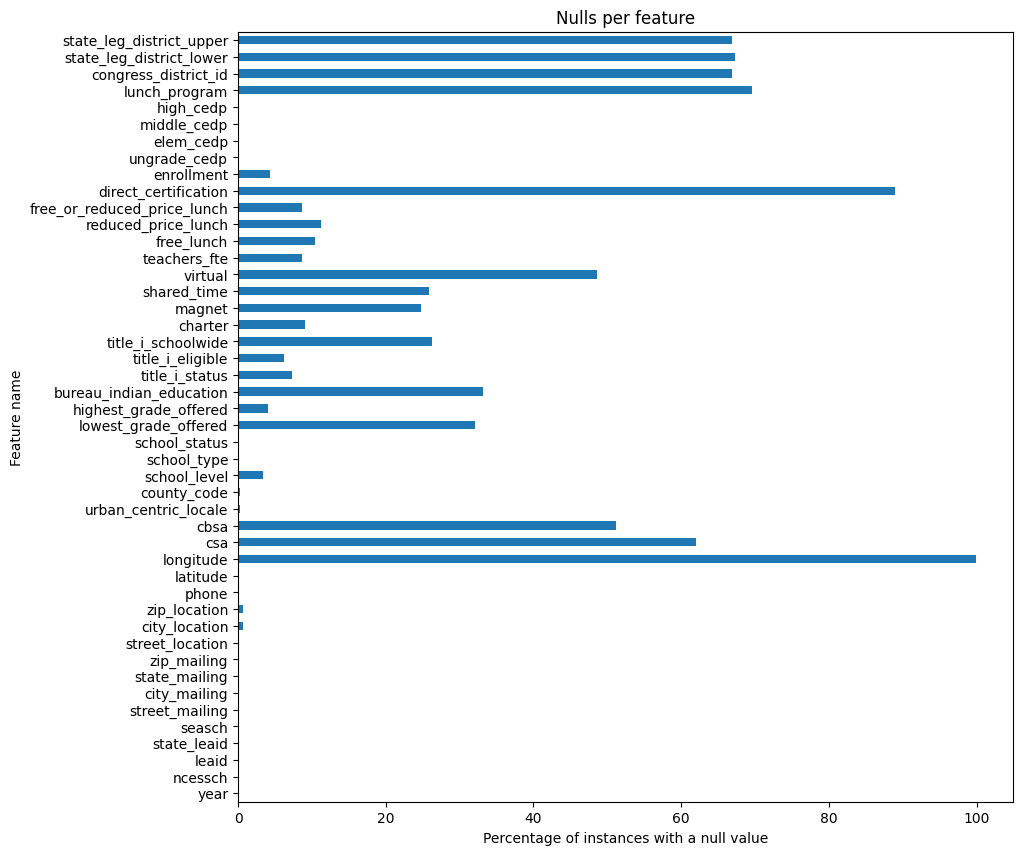

In [31]:
(our_years.isnull().sum() / len(our_years) * 100).plot.barh()
plt.rcParams["figure.figsize"] = (10,14)
plt.title("Nulls per feature")
plt.ylabel("Feature name")
plt.xlabel("Percentage of instances with a null value")

Observation: Looking in the codebook, we see that many features have special values to indicate missingness.
* -1—Missing/not reported
* -2—Not applicable
* -3—Suppressed data
* Source: https://educationdata.urban.org/documentation/schools.html 


In [11]:
# Find strings equal to -1,-2, or -3
special_vals = pd.DataFrame([(our_years.select_dtypes(include=[object]) == "-1").sum(), (our_years.select_dtypes(
    include=[object]) == "-2").sum(), (our_years.select_dtypes(include=[object]) == "-3").sum()])
special_vals.index = ["-1", "-2", "-3"]
special_vals


,state_leaid,seasch,street_mailing,city_mailing,state_mailing,zip_mailing,street_location,city_location,phone,state_leg_district_lower,state_leg_district_upper
-1,0,23,12,0,0,0,654,6335,537,0,0
-2,0,0,8,0,0,0,0,0,28,4447,419
-3,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# Find numbers equal to -1,-2, or -3
special_vals = pd.DataFrame([(our_years.select_dtypes(include=[np.number]) == -1).sum(), (our_years.select_dtypes(
    include=[np.number]) == -2).sum(), (our_years.select_dtypes(include=[np.number]) == -3).sum()])
special_vals.index = ["-1", "-2", "-3"]
special_vals


,year,ncessch,leaid,zip_location,latitude,longitude,csa,cbsa,urban_centric_locale,county_code,school_level,school_type,school_status,lowest_grade_offered,highest_grade_offered,bureau_indian_education,title_i_status,title_i_eligible,title_i_schoolwide,charter,magnet,shared_time,virtual,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,direct_certification,enrollment,ungrade_cedp,elem_cedp,middle_cedp,high_cedp,lunch_program,congress_district_id
-1,0,0,0,6211,0,0,0,0,77,77,7155,0,0,271574,11780,0,33213,19650,19475,859,83431,226691,29156,45184,23179,24255,14018,0,5389,0,0,0,0,18068,0
-2,0,0,0,0,0,0,159294,59382,906,968,24130,0,0,17770,17770,0,20457,24370,182650,82179,133601,0,0,10883,19226,19226,19226,0,17429,0,0,0,0,0,120
-3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1509,1509,1509,0,0,0,0,717,4157,4157,4157,0,247,0,0,0,0,0,0


In [13]:
str_cols = our_years.select_dtypes(include=object).columns.tolist()
num_cols = our_years.select_dtypes(include=np.number).columns.tolist()
str_col_special_nans = (our_years[str_cols] == "-1") | (our_years[str_cols] == "-2") 
num_col_special_nans = (our_years[num_cols] < 0)
assert "highest_grade_offered" in num_cols

In [14]:
our_years[str_cols].head(n=3)

,state_leaid,seasch,street_mailing,city_mailing,state_mailing,zip_mailing,street_location,city_location,phone,state_leg_district_lower,state_leg_district_upper
2252826,210,0020,P O BOX 9486,BIRMINGHAM,AL,35220,RT 2 OLD SPRINGVILLE RD,PINSON,2056808574,NaN,NaN
2252827,210,0025,315 OUTBACK ROAD,CLAYTON,AL,36016,315 OUTBACK RD,CLAYTON,3346874441,NaN,NaN
2252828,210,0050,P O BOX 66,MT MEIGS,AL,36057,INDUSTRIAL SCHOOL RD,MT MEIGS,3342153850,NaN,NaN


### Impute special missing values as np.nan so that all nans are grouped together

In [15]:
our_years.loc[:,str_cols] = our_years[str_cols].where(~str_col_special_nans,other=np.nan)
our_years.loc[:,num_cols] = our_years[num_cols].where(~num_col_special_nans,other=np.nan)

Text(0.5, 0, 'Percentage of instances with a null value')

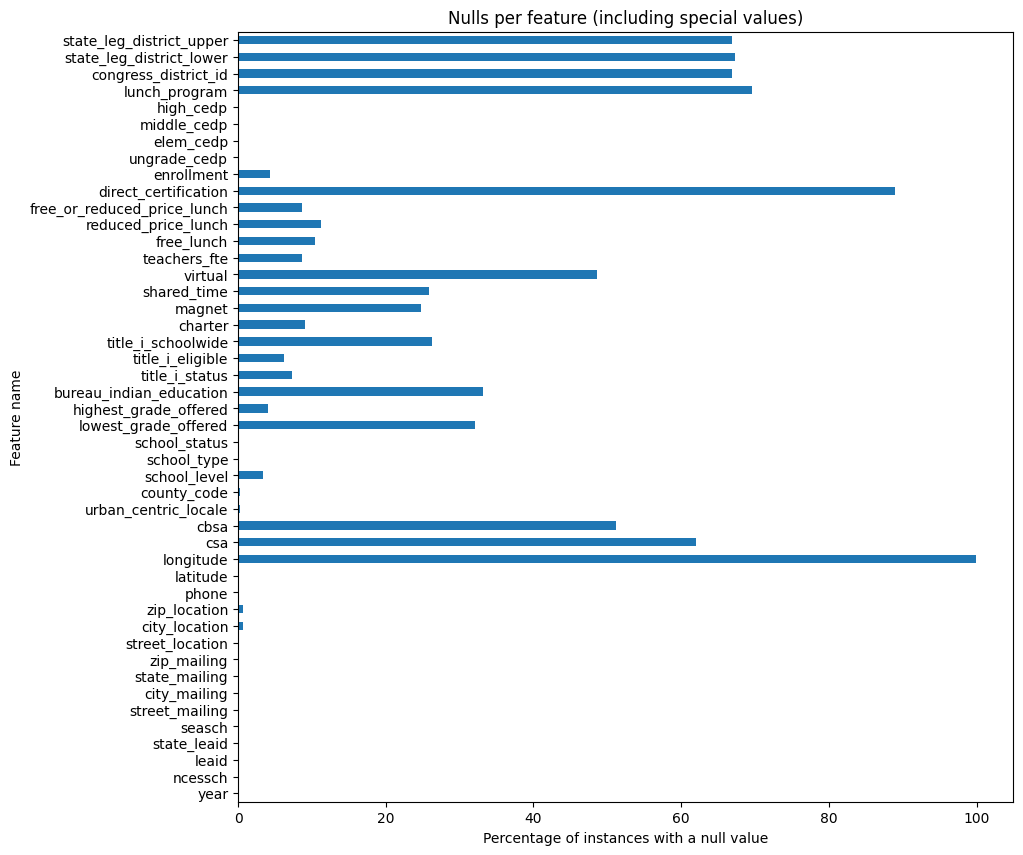

In [16]:
plt.rcParams["figure.figsize"] = (10,10)
(our_years.isnull().sum() / len(our_years) * 100.0).plot.barh()
plt.title("Nulls per feature (including special values)")
plt.ylabel("Feature name")
plt.xlabel("Percentage of instances with a null value")

### Visualize patterns of missingness

<AxesSubplot: >

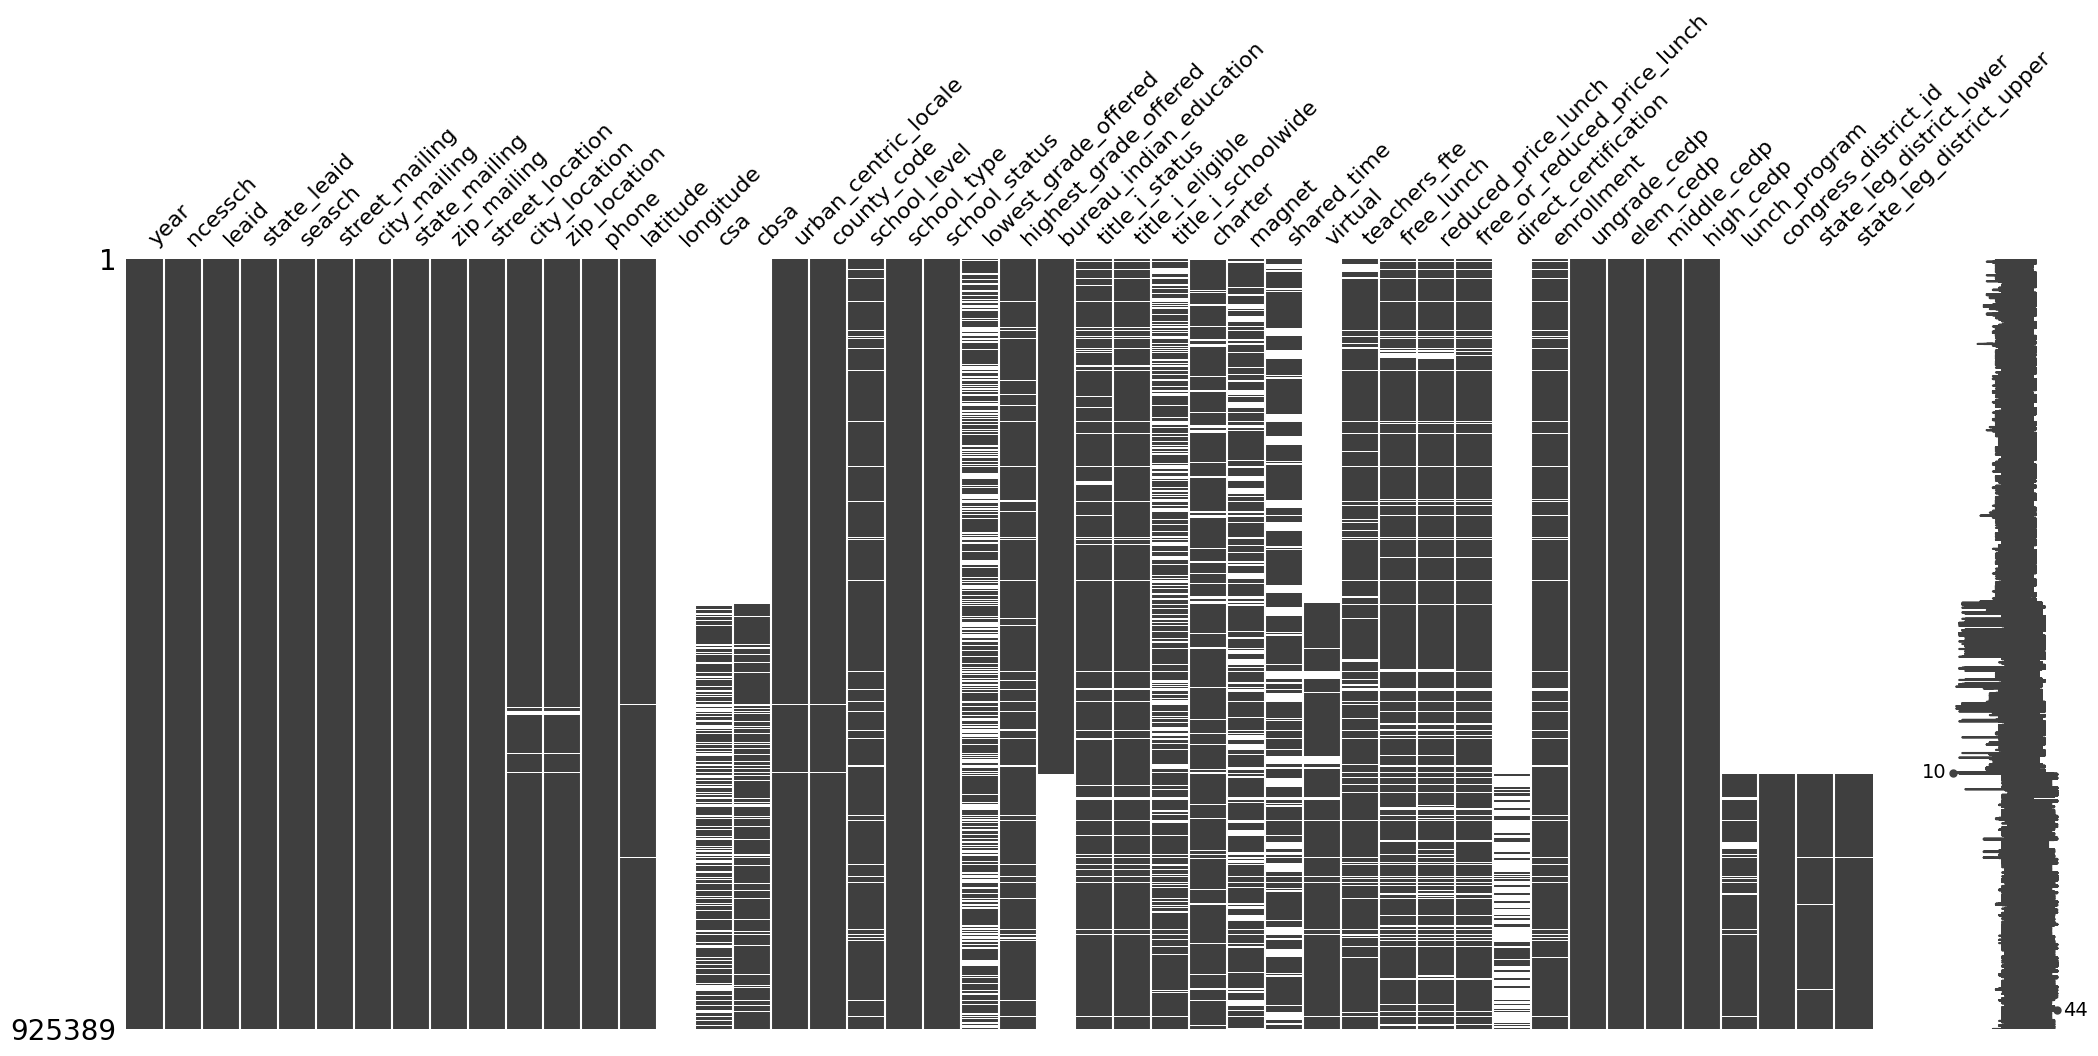

In [17]:
import missingno
missingno.matrix(our_years)

Observations:
* city_location and zip_location have matching patterns of missingness
* longitude is missing in ~95% of instances
* csa and cbsa having overlapping but different patterns of missingess
* title_i_status and title_i_eligible have almost matching patterns of missingness
* free_lunch, reduced_price_lunch, free_or_reduced_price_lunch have matching missingness and almost match with enrollment
* lunch_program, congress_district_id, state_leg_district_lower, and state_leg_district_upper are missing over 60% of their values in same spots.

### Percentage of schools that are high schools and thus relevant to our study

Text(0, 0.5, 'Highest grade offered')

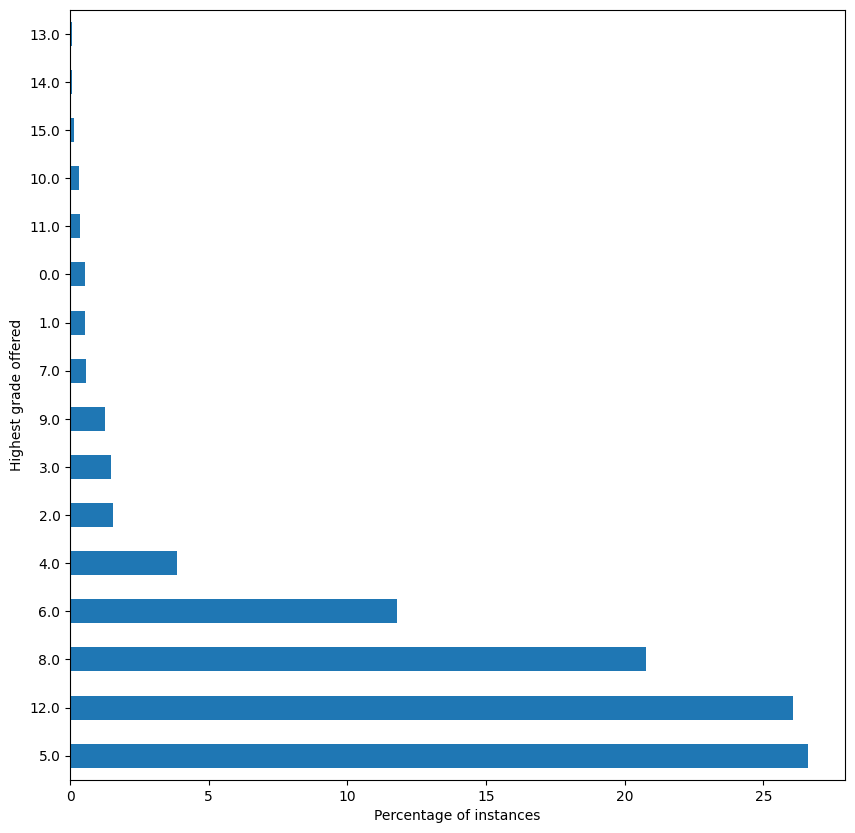

In [18]:
(our_years.highest_grade_offered.value_counts(sort=True) / len(our_years) * 100.0).plot.barh()
plt.xlabel("Percentage of instances")
plt.ylabel("Highest grade offered")

### Stategy
*  Approximately 70% of this data does not overlap with our public high school graduation rate dataset. 
*  Merge with the graduation rate dataset so that further exploration is focused on data that will be in our model.
### TODO for Merged dataset 
*  Pairplot and boxplots of interesting numerical columns
*  Histograms (or other) of categoricals
*  Swarm plots of categoricals versus numericals

### Merge with cleaned graduation rate dataframe

In [19]:
gr = pd.read_csv('cleaned_mega_grad_rate_frame.csv.bak')

In [20]:
gr

,Year,STNAM,FIPST,LEAID,LEANM,NCESSCH,SCHNAM,ALL_COHORT_,ALL_RATE_
0,2010,ALABAMA,1,100005,Albertville City,10000500871,Albertville High Sch,252,80.0
1,2010,ALABAMA,1,100006,Marshall County,10000600872,Asbury Sch,57,74.5
2,2010,ALABAMA,1,100006,Marshall County,10000600878,Douglas High Sch,125,67.0
3,2010,ALABAMA,1,100006,Marshall County,10000600883,Kate D Smith DAR High Sch,121,82.0
4,2010,ALABAMA,1,100006,Marshall County,10000601585,Brindlee Mt High Sch,94,77.0
...,...,...,...,...,...,...,...,...,...
186136,2018,WYOMING,56,5605820,Washakie County School District #2,560582000393,Ten Sleep K-12,8,75.0
186137,2018,WYOMING,56,5605830,Teton County School District #1,560583000335,Jackson Hole High School,163,97.5
186138,2018,WYOMING,56,5605830,Teton County School District #1,560583000512,Summit Innovations School,20,90.0
186139,2018,WYOMING,56,5606090,Weston County School District #7,560609000401,Upton High School,25,69.5


In [21]:
merge0 = gr.merge(our_years,how='inner', left_on=('Year','NCESSCH'),right_on=('year','ncessch'))

In [22]:
merge0

,Year,STNAM,FIPST,LEAID,LEANM,NCESSCH,SCHNAM,ALL_COHORT_,ALL_RATE_,year,ncessch,leaid,state_leaid,seasch,street_mailing,city_mailing,state_mailing,zip_mailing,street_location,city_location,zip_location,phone,latitude,longitude,csa,cbsa,urban_centric_locale,county_code,school_level,school_type,school_status,lowest_grade_offered,highest_grade_offered,bureau_indian_education,title_i_status,title_i_eligible,title_i_schoolwide,charter,magnet,shared_time,virtual,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,direct_certification,enrollment,ungrade_cedp,elem_cedp,middle_cedp,high_cedp,lunch_program,congress_district_id,state_leg_district_lower,state_leg_district_upper
0,2010,ALABAMA,1,100005,Albertville City,10000500871,Albertville High Sch,252,80.0,2010,10000500871,100005.0,101,0020,402 E MCCORD AVE,ALBERTVILLE,AL,35950,402 EAST MCCORD AVE,ALBERTVILLE,35950.0,2568786580,34.3,NaN,NaN,NaN,32.0,1095.0,3.0,1.0,1.0,9.0,12.0,0.0,6.0,0.0,NaN,NaN,0.0,0.0,NaN,70.0,424.0,41.0,465.0,NaN,1042.0,0,0,0,1,NaN,NaN,NaN,NaN
1,2010,ALABAMA,1,100006,Marshall County,10000600872,Asbury Sch,57,74.5,2010,10000600872,100006.0,048,0030,1990 ASBURY RD,ALBERTVILLE,AL,35950,1990 ASBURY RD,ALBERTVILLE,35950.0,2568784068,34.4,NaN,NaN,NaN,42.0,1095.0,4.0,1.0,1.0,0.0,12.0,0.0,3.0,1.0,1.0,NaN,0.0,0.0,NaN,66.2,709.0,77.0,786.0,NaN,963.0,0,1,1,1,NaN,NaN,NaN,NaN
2,2010,ALABAMA,1,100006,Marshall County,10000600878,Douglas High Sch,125,67.0,2010,10000600878,100006.0,048,0100,P O BOX 300,DOUGLAS,AL,35964,HWY 75,DOUGLAS,35964.0,2565932810,34.2,NaN,NaN,NaN,42.0,1095.0,3.0,1.0,1.0,9.0,12.0,0.0,3.0,1.0,1.0,NaN,0.0,0.0,NaN,34.0,299.0,51.0,350.0,NaN,536.0,0,0,0,1,NaN,NaN,NaN,NaN
3,2010,ALABAMA,1,100006,Marshall County,10000600883,Kate D Smith DAR High Sch,121,82.0,2010,10000600883,100006.0,048,0140,6077 MAIN ST,GRANT,AL,35747,6077 MAIN ST,GRANT,35747.0,2567284238,34.5,NaN,NaN,NaN,42.0,1095.0,3.0,1.0,1.0,9.0,12.0,0.0,3.0,1.0,1.0,NaN,0.0,0.0,NaN,35.0,176.0,53.0,229.0,NaN,468.0,0,0,0,1,NaN,NaN,NaN,NaN
4,2010,ALABAMA,1,100006,Marshall County,10000601585,Brindlee Mt High Sch,94,77.0,2010,10000601585,100006.0,048,0042,994 SCANT CITY ROAD,GUNTERSVILLE,AL,35976,994 SCANT CITY RD,GUNTERSVILLE,35976.0,2567532800,34.4,NaN,NaN,NaN,42.0,1095.0,3.0,1.0,1.0,9.0,12.0,0.0,3.0,1.0,1.0,NaN,0.0,0.0,NaN,31.2,167.0,37.0,204.0,NaN,365.0,0,0,0,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186008,2018,WYOMING,56,5605820,Washakie County School District #2,560582000393,Ten Sleep K-12,8,75.0,2018,560582000393,5605820.0,WY-2202000,2202000-2202049,P.O. Box 105,Ten Sleep,WY,82442,242 Cedar St,Ten Sleep,82442.0,(307)366-2233,44.0,NaN,NaN,NaN,43.0,56043.0,4.0,1.0,1.0,NaN,12.0,NaN,6.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5,33.0,8.0,41.0,3.0,108.0,0,1,1,1,1.0,5600.0,56027,56020
186009,2018,WYOMING,56,5605830,Teton County School District #1,560583000335,Jackson Hole High School,163,97.5,2018,560583000335,5605830.0,WY-2001000,2001000-2001055,P.O. Box 568,Jackson,WY,83001,1910 West High School Road,Jackson,83001.0,(307)732-3700,43.5,NaN,NaN,27220.0,41.0,56039.0,3.0,1.0,1.0,9.0,12.0,NaN,6.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,83.0,49.0,132.0,3.0,720.0,0,0,0,1,1.0,5600.0,56023,56017
186010,2018,WYOMING,56,5605830,Teton County School District #1,560583000512,Summit Innovations School,20,90.0,2018,560583000512,5605830.0,WY-2001000,2001000-2001056,P.O. Box 568,Jackson,WY,83001,100 Middle School Road,Jackson,83001.0,(307)733-9116,43.5,NaN,NaN,27220.0,33.0,56039.0,3.0,1.0,1.0,9.0,12.0,NaN,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,16.0,4.0,20.0,3.0,49.0,0,0,0,1,1.0,5600.0,56016,56017
186011,2018,WYOMING,56,5606090,Weston County School District #7,560609000401,Upton High School,25,69.5,2018,560609000401,5606090.0,WY-2307000,2307000-2307055,P.O. Box 470,Upton,WY,82730,610 Poplar,Upton,82730.0,(307)468-2361,44.1,NaN,NaN,NaN,43.0,56045.

### Verify that all schools in the merged dataset are high schools

In [23]:
merge0.highest_grade_offered.value_counts()

12.0    184705
13.0       535
9.0        308
11.0       171
10.0        94
8.0         67
14.0        19
15.0        11
6.0          8
5.0          2
1.0          1
3.0          1
Name: highest_grade_offered, dtype: int64

In [24]:
non_high_schools = merge0.query('highest_grade_offered <= 9')
non_high_schools

,Year,STNAM,FIPST,LEAID,LEANM,NCESSCH,SCHNAM,ALL_COHORT_,ALL_RATE_,year,ncessch,leaid,state_leaid,seasch,street_mailing,city_mailing,state_mailing,zip_mailing,street_location,city_location,zip_location,phone,latitude,longitude,csa,cbsa,urban_centric_locale,county_code,school_level,school_type,school_status,lowest_grade_offered,highest_grade_offered,bureau_indian_education,title_i_status,title_i_eligible,title_i_schoolwide,charter,magnet,shared_time,virtual,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,direct_certification,enrollment,ungrade_cedp,elem_cedp,middle_cedp,high_cedp,lunch_program,congress_district_id,state_leg_district_lower,state_leg_district_upper
7,2010,ALABAMA,1,100007,Hoover City,10000701825,Hoover High Freshman Ctr,23,10.0,2010,10000701825,100007.0,158,0821,100 FLEMMING PARKWAY,HOOVER,AL,35244,100 FLEMMING PARKWAY,HOOVER,35244.0,2054391610,33.3,NaN,NaN,NaN,41.0,1117.0,4.0,4.0,1.0,9.0,9.0,0.0,6.0,0.0,NaN,NaN,0.0,0.0,NaN,45.9,101.0,23.0,124.0,NaN,654.0,0,0,0,1,NaN,NaN,NaN,NaN
149,2010,ALABAMA,1,101530,Florence City,10153000531,Florence Freshman Ctr,16,10.0,2010,10153000531,101530.0,141,0040,648 CHERRY,FLORENCE,AL,35630,648 CHERRY,FLORENCE,35630.0,2567682400,34.8,NaN,NaN,NaN,13.0,1077.0,4.0,1.0,1.0,9.0,9.0,0.0,6.0,0.0,NaN,NaN,0.0,0.0,NaN,20.5,147.0,19.0,166.0,NaN,307.0,0,0,0,1,NaN,NaN,NaN,NaN
242,2010,ALABAMA,1,102220,Madison County,10222001821,Sparkman Ninth Grade Sch,33,5.0,2010,10222001821,102220.0,045,0191,2680 JEFF ROAD,HARVEST,AL,35749,2680 JEFF RD,HARVEST,35749.0,2563822030,34.8,NaN,NaN,NaN,41.0,1089.0,4.0,1.0,1.0,9.0,9.0,0.0,6.0,0.0,NaN,NaN,0.0,0.0,NaN,39.4,148.0,39.0,187.0,NaN,642.0,0,0,0,1,NaN,NaN,NaN,NaN
659,2010,ARIZONA,4,400281,Masada Charter School Inc.,40028102187,Masada Charter School,12,25.0,2010,40028102187,400281.0,79499,79511,PO BOX 2277,CENTENNIAL PARK,AZ,86021,365 WEST CANNON AVE,CENTENNIAL PARK,86021.0,9288752525,37.0,NaN,NaN,NaN,41.0,4015.0,4.0,1.0,1.0,0.0,9.0,0.0,5.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,272.0,0.0,272.0,NaN,489.0,0,1,1,0,NaN,NaN,NaN,NaN
866,2010,ARIZONA,4,404970,Mesa Unified District,40497000387,Fremont Junior High School,11,25.0,2010,40497000387,404970.0,4235,4971,1001 N POWER ROAD,MESA,AZ,85205,1001 NORTH POWER RD,MESA,85205.0,4804720200,33.4,NaN,NaN,NaN,11.0,4013.0,2.0,1.0,1.0,7.0,9.0,0.0,5.0,1.0,1.0,0.0,NaN,0.0,NaN,68.1,461.0,71.0,532.0,NaN,1323.0,0,0,1,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178647,2018,NORTH CAROLINA,37,3702940,McDowell County Schools,370294003353,Foothills Community School,6,25.0,2018,370294003353,3702940.0,NC-590,590-393,346 West McDowell School Road,Marion,NC,28752,346 West McDowell School Road,Marion,28752.0,(828)652-3390,35.7,NaN,280.0,32000.0,41.0,37111.0,2.0,1.0,1.0,6.0,8.0,NaN,4.0,1.0,1.0,0.0,1.0,0.0,0.0,10.1,67.0,19.0,86.0,NaN,188.0,0,0,1,0,1.0,3711.0,37085,37047
182125,2018,TENNESSEE,47,4700780,Coffee County,470078002420,Coffee County Raider Academy,13,25.0,2018,470078002420,4700780.0,TN-00160,00160-0055,865 McMinnville HWY,Manchester,TN,37355,865 McMinnville HWY,Manchester,37355.0,(931)723-3309,35.5,NaN,NaN,46100.0,32.0,47031.0,7.0,1.0,1.0,9.0,9.0,NaN,6.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,NaN,NaN,NaN,113.0,426.0,0,0,0,1,1.0,4706.0,47047,47016
184833,2018,WASHINGTON,53,5302310,Eastmont School District,530231000323,Eastmont Junior High,8,25.0,2018,530231000323,5302310.0,WA-09206,09206-3372,905 NE 8th Street,East Wenatchee,WA,98802,905 NE 8th Street,East Wenatchee,98802.0,(509)884-2407,47.4,NaN,NaN,48300.0,23.0,53017.0,7.0,1.0,1.0,8.0,9.0,NaN,4.0,1.0,1.0,0.0,0.0,NaN,0.0,49.4,453.0,101.0,554.0,183.0,927.0,0,0,1,0,1.0,5308.0,53012,53012
185939,2018,WYOMING,56,5601470,Campbell County School District #1,560147000058,Twin Spruce Junior High School,13,25.0,2018,560147000058,5601470.0,WY-0301000,0301000-0301050,P.O. Box 3033,Gillette,WY,82

### A very small number of schools are middle schools or junior high schools. They are dropped along with some duplicate columns.

In [25]:
merge0.drop(non_high_schools.index,axis=0,inplace=True)

In [26]:
assert merge0.Year.all() == merge0.year.all()
assert merge0.NCESSCH.all() == merge0.ncessch.all()
assert merge0.LEAID.all() == merge0.leaid.all()

In [27]:
merge0.drop(['year','ncessch','leaid'],axis=1,inplace=True)

In [28]:
merge0.shape

(185626, 52)

In [29]:
plt.rcParams["figure.figsize"] = (10,10)
# Insert cool figure showing ALL_RATE or something else

In [30]:
merge0.head()

,Year,STNAM,FIPST,LEAID,LEANM,NCESSCH,SCHNAM,ALL_COHORT_,ALL_RATE_,state_leaid,seasch,street_mailing,city_mailing,state_mailing,zip_mailing,street_location,city_location,zip_location,phone,latitude,longitude,csa,cbsa,urban_centric_locale,county_code,school_level,school_type,school_status,lowest_grade_offered,highest_grade_offered,bureau_indian_education,title_i_status,title_i_eligible,title_i_schoolwide,charter,magnet,shared_time,virtual,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,direct_certification,enrollment,ungrade_cedp,elem_cedp,middle_cedp,high_cedp,lunch_program,congress_district_id,state_leg_district_lower,state_leg_district_upper
0,2010,ALABAMA,1,100005,Albertville City,10000500871,Albertville High Sch,252,80.0,101,0020,402 E MCCORD AVE,ALBERTVILLE,AL,35950,402 EAST MCCORD AVE,ALBERTVILLE,35950.0,2568786580,34.3,NaN,NaN,NaN,32.0,1095.0,3.0,1.0,1.0,9.0,12.0,0.0,6.0,0.0,NaN,NaN,0.0,0.0,NaN,70.0,424.0,41.0,465.0,NaN,1042.0,0,0,0,1,NaN,NaN,NaN,NaN
1,2010,ALABAMA,1,100006,Marshall County,10000600872,Asbury Sch,57,74.5,048,0030,1990 ASBURY RD,ALBERTVILLE,AL,35950,1990 ASBURY RD,ALBERTVILLE,35950.0,2568784068,34.4,NaN,NaN,NaN,42.0,1095.0,4.0,1.0,1.0,0.0,12.0,0.0,3.0,1.0,1.0,NaN,0.0,0.0,NaN,66.2,709.0,77.0,786.0,NaN,963.0,0,1,1,1,NaN,NaN,NaN,NaN
2,2010,ALABAMA,1,100006,Marshall County,10000600878,Douglas High Sch,125,67.0,048,0100,P O BOX 300,DOUGLAS,AL,35964,HWY 75,DOUGLAS,35964.0,2565932810,34.2,NaN,NaN,NaN,42.0,1095.0,3.0,1.0,1.0,9.0,12.0,0.0,3.0,1.0,1.0,NaN,0.0,0.0,NaN,34.0,299.0,51.0,350.0,NaN,536.0,0,0,0,1,NaN,NaN,NaN,NaN
3,2010,ALABAMA,1,100006,Marshall County,10000600883,Kate D Smith DAR High Sch,121,82.0,048,0140,6077 MAIN ST,GRANT,AL,35747,6077 MAIN ST,GRANT,35747.0,2567284238,34.5,NaN,NaN,NaN,42.0,1095.0,3.0,1.0,1.0,9.0,12.0,0.0,3.0,1.0,1.0,NaN,0.0,0.0,NaN,35.0,176.0,53.0,229.0,NaN,468.0,0,0,0,1,NaN,NaN,NaN,NaN
4,2010,ALABAMA,1,100006,Marshall County,10000601585,Brindlee Mt High Sch,94,77.0,048,0042,994 SCANT CITY ROAD,GUNTERSVILLE,AL,35976,994 SCANT CITY RD,GUNTERSVILLE,35976.0,2567532800,34.4,NaN,NaN,NaN,42.0,1095.0,3.0,1.0,1.0,9.0,12.0,0.0,3.0,1.0,1.0,NaN,0.0,0.0,NaN,31.2,167.0,37.0,204.0,NaN,365.0,0,0,0,1,NaN,NaN,NaN,NaN
